In [ ]:
import pandas as pd
import string, re


!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# change directory
%cd /content/gdrive/MyDrive/Stupen

/content/gdrive/MyDrive/Stupen


In [ ]:
# load csv file using pandas
df = pd.read_csv('sample_data.csv')
print(df.shape)
df.head()

(1200, 3)


,Sentiment,Customer Review,corpus
0,Positive,"Barang bagus, pengiriman juga cepat. Cuma minu...","barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,LENGKAP BAGUS PENGIRIMAN CEPAT DAN TEPAT TERPE...,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"Bahan tipis, seller ramah, ekspedisi cpt","bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...,produk asli original. suplemen bagus tanpa efe...
4,Positive,Model dan warna aku suka tp pemasangan sedikit...,model dan warna aku suka tp pemasangan sedikit...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiment        1200 non-null   object
 1   Customer Review  1200 non-null   object
 2   corpus           1200 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


In [ ]:
cols = ['Sentiment','corpus']
df = df[cols]
df = df.dropna()
print(df.shape)
df.head()

(1200, 2)


,Sentiment,corpus
0,Positive,"barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...
4,Positive,model dan warna aku suka tp pemasangan sedikit...


In [ ]:
df.Sentiment.value_counts()

Sentiment
Positive    600
Negative    600
Name: count, dtype: int64

In [ ]:
#mencari data dengan review lebih dari 1 kata
df = df[df.corpus.str.split().str.len()>1]
print(df.shape)
df.head()

(1182, 2)


,Sentiment,corpus
0,Positive,"barang bagus, pengiriman juga cepat. cuma minu..."
1,Positive,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,"bahan tipis, seller ramah, ekspedisi cpt"
3,Positive,produk asli original. suplemen bagus tanpa efe...
4,Positive,model dan warna aku suka tp pemasangan sedikit...


#Punctuation

In [ ]:
df['corpus'] = df.corpus.str.translate(str.maketrans('', '', string.punctuation))
print(df.shape)
df.head()

(1182, 2)


,Sentiment,corpus
0,Positive,barang bagus pengiriman juga cepat cuma minus ...
1,Positive,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,bahan tipis seller ramah ekspedisi cpt
3,Positive,produk asli original suplemen bagus tanpa efek...
4,Positive,model dan warna aku suka tp pemasangan sedikit...


# Slangword

In [ ]:
slang_dict = pd.read_csv('kamusalay.csv', encoding='latin1',names=['alay','normal'])
slang_dict = dict(zip(slang_dict.alay.tolist(),slang_dict.normal.tolist()))

In [ ]:
def cvt_slang(sentence):
  return ''.join(' ').join(t for t in [slang_dict[x] if x in slang_dict.keys() else x for x in sentence.split()])

In [ ]:
df['corpus'] = df.corpus.apply(cvt_slang)
print(df.shape)
df.head()

(1182, 2)


,Sentiment,corpus
0,Positive,barang bagus pengiriman juga cepat cuma minus ...
1,Positive,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original suplemen bagus tanpa efek...
4,Positive,model dan warna aku suka tetapi pemasangan sed...


#Repetition Character

In [ ]:
def repetition_char(txt):
  sub_str = re.findall(r"((\w)\2{2,})",txt)
  for x in sub_str:
    txt = txt.replace(x[0],x[1])
  return txt

In [ ]:
df['corpus'] = df.corpus.apply(repetition_char)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(1182, 2)


,Sentiment,corpus
0,Positive,barang bagus pengiriman juga cepat cuma minus ...
1,Positive,lengkap bagus pengiriman cepat dan tepat terpe...
2,Positive,bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original suplemen bagus tanpa efek...
4,Positive,model dan warna aku suka tetapi pemasangan sed...


#Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['corpus'] = df.corpus.progress_apply(lambda x : stemmer.stem(str(x)))
print(df.shape)
df.head()

100%|██████████| 1182/1182 [03:55<00:00,  5.01it/s]

(1182, 2)


,Sentiment,corpus
0,Positive,barang bagus kirim juga cepat cuma minus di pa...
1,Positive,lengkap bagus kirim cepat dan tepat terpercaya...
2,Positive,bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original suplemen bagus tanpa efek...
4,Positive,model dan warna aku suka tetapi pasang sedikit...


#Stopword

In [ ]:
stops = pd.read_csv('stopwordbahasa.csv',header=None)
stop_factory = StopWordRemoverFactory()
STOPS = stop_factory.get_stop_words()+stops[0].tolist()
STOPS = set(STOPS)

In [ ]:
df['corpus'] = df.corpus.progress_apply(lambda c : ''.join(' ').join(x for x in c.split() if x not in STOPS))
print(df.shape)
df.head()

100%|██████████| 1182/1182 [00:00<00:00, 113937.93it/s]

(1182, 2)


,Sentiment,corpus
0,Positive,barang bagus kirim cepat minus packaging nya r...
1,Positive,lengkap bagus kirim cepat terpercayaa nomor 1 ...
2,Positive,bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original suplemen bagus efek sampi...
4,Positive,model warna suka pasang ribet moga awet


In [ ]:
#save to csv
df.to_csv('data_bersih.csv',index=False)

#Modelling

In [ ]:
import pandas as pd
from time import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df2 = pd.read_csv('data_bersih.csv')
print(df.shape)
df.head()

(1182, 2)


,Sentiment,corpus
0,Positive,barang bagus kirim cepat minus packaging nya r...
1,Positive,lengkap bagus kirim cepat terpercayaa nomor 1 ...
2,Positive,bahan tipis seller ramah ekspedisi cepat
3,Positive,produk asli original suplemen bagus efek sampi...
4,Positive,model warna suka pasang ribet moga awet


In [ ]:
df2.isnull().sum()

Sentiment    0
corpus       1
dtype: int64

In [ ]:
df2 = df2.dropna()
print(df2.shape)
print(df2.Sentiment.value_counts())

(1181, 2)
Sentiment
Negative    592
Positive    589
Name: count, dtype: int64


In [ ]:
x, y =df2.corpus, df2.Sentiment

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print("train size:",x_train.shape)
print("test size:",x_test.shape)

train size: (944, 2438)
test size: (237, 2438)


In [ ]:
from sklearn.svm import SVC

st = time()
model = SVC()
model.fit(x_train,y_train)
print("[DONE] training process finished:",time()-st,"second(s)\n")
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[DONE] training process finished: 0.1598374843597412 second(s)

              precision    recall  f1-score   support

    Negative       0.90      0.93      0.92       131
    Positive       0.91      0.88      0.89       106

    accuracy                           0.91       237
   macro avg       0.91      0.90      0.91       237
weighted avg       0.91      0.91      0.91       237

[[122   9]
 [ 13  93]]


<Axes: >

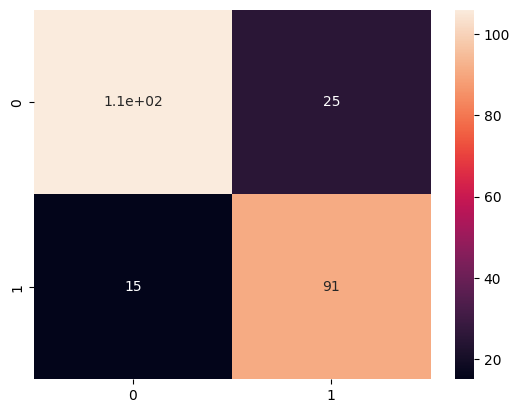

In [ ]:
# show confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

*   Hasil akurasi menggunakan model SVM yaitu 0.91 atau 91% yang berarti model cukup baik membaca data dengan benar
*   Data yang diprediksi (benar) termasuk kategori Negative sebesar 92%
*   Data yang diprediksi (benar) termasuk kategori Positive sebesar 89%




